In [1]:
import pandas as pd
adni_training=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_training.csv")
habs_training=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_training.csv")
pointer_training=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\pointer_thickess_Dec_18_training.csv")
adni_training=adni_training.fillna('NA')
habs_training=habs_training.fillna('NA')
pointer_training=pointer_training.fillna('NA')

adni_baseline=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\baseline_covariates.csv")
adni_baseline_filtered=adni_baseline[adni_baseline['RID'].isin(adni_training['RID'])]
adni_baseline_final=adni_baseline_filtered.drop(columns=['PTADBEG',"APOE4_BIN","VISCODE","VISCODE2","VISDATE"])
adni_training_filtered=adni_training[adni_training["zscore_meta_tau"]!="NA"]
adni_training_final=adni_training_filtered.drop(columns=['abeta_SCANDATE',"tau_SCANDATE","VISCODE","VISCODE2","VISDATE","AMYLOID_STATUS","AMYLOID_STATUS_COMPOSITE_REF","ctx_entor/subcor","meta/subcor","Rate_of_Change","CTX_ENTORHINAL_SUVR","ERODED_SUBCORTICALWM_SUVR","abeta_Age","tau_Age","Rate_of_Change_meta","Rate_of_Change_ctx","Visit time tau","Rate_of_Change","Visit time mmse","Initial tau status meta","Initial tau status ctx","low_meta","intermediate_meta","high_meta","very_high_meta","low_ctx","intermediate_ctx","high_ctx","very_high_ctx","back_VISDATE", 
                                         "DX_EXAMDATE","GDS_VISDATE","Neuro_VISDATE","NPIQ_VISDATE","VS_VISDATE","EXAMDATE","CENTILOIDS","AGE_BL","PTGENDER","PTEDUCAT","PTETHCAT","PTRACCAT","PTMARRY","APOE4","DX", 'META_TEMPORAL_SUVR','Rate_of_abeta_Change','Visit time mmse',"APOE4","DX","SUBJECT","SCANDATE","zscore_abeta","zscore_ptau","zscore_total_tau", "zscore_ctx_tau","CTX_ENTORHINAL_SUVR","zscore_blood_abeta","zscore_blood_tau","zscore_blood_ptau","Rate_of_Change_mPACCdigit_new","Visit time mPACCdigit","Rate_of_Change_MMSCORE_new"
])

D:\ANACONDA\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\ANACONDA\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#adni_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\dataset\\adni_testing_Sep24.csv")
adni_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_testing.csv")
adni_testing=adni_testing.fillna('NA')
adni_baseline_filtered=adni_baseline[adni_baseline['RID'].isin(adni_testing['RID'])]
adni_baseline_final=adni_baseline_filtered.drop(columns=['PTADBEG',"APOE4_BIN","VISCODE","VISCODE2","VISDATE"])
adni_testing_filtered=adni_testing[adni_testing["zscore_meta_tau"]!="NA"]
adni_testing_final=adni_testing_filtered.drop(columns=['abeta_SCANDATE',"tau_SCANDATE","VISCODE2","VISDATE","AMYLOID_STATUS","AMYLOID_STATUS_COMPOSITE_REF","ctx_entor/subcor","meta/subcor","Rate_of_Change","CTX_ENTORHINAL_SUVR","ERODED_SUBCORTICALWM_SUVR","abeta_Age","tau_Age","Rate_of_Change_meta","Rate_of_Change_ctx","Visit time tau","Rate_of_Change","Visit time mmse","Initial tau status meta","Initial tau status ctx","low_meta","intermediate_meta","high_meta","very_high_meta","low_ctx","intermediate_ctx","high_ctx","very_high_ctx","back_VISDATE", 
                                         "DX_EXAMDATE","GDS_VISDATE","Neuro_VISDATE","NPIQ_VISDATE","VS_VISDATE","EXAMDATE","AGE_BL","PTGENDER","PTEDUCAT","PTETHCAT","PTRACCAT","PTMARRY","APOE4","DX", 'META_TEMPORAL_SUVR','Rate_of_abeta_Change','Visit time mmse',"APOE4","DX","SUBJECT","SCANDATE","zscore_abeta","zscore_ptau","zscore_total_tau", "CENTILOIDS","zscore_ctx_tau","zscore_blood_abeta","zscore_blood_tau","zscore_blood_ptau","Rate_of_Change_mPACCdigit_new","Visit time mPACCdigit","Rate_of_Change_MMSCORE_new"
])
adni_merged_testing = pd.merge(adni_testing_final, adni_baseline_final, on='RID', how='left')
diagnosis_map = {
    'CN': 'Cognitive normal',
    'MCI': 'Mildly cognitive impairment',
    'Unknown Diagnosis': 'NA',
    'Midly cognitive impairment': 'Mildly cognitive impairment',
}
adni_merged_testing['DIAGNOSIS'] = adni_merged_testing['DIAGNOSIS'].replace(diagnosis_map)
adni_merged_testing['ABETA40'] = pd.to_numeric(adni_merged_testing['ABETA40'], errors='coerce')
adni_merged_testing['ABETA42'] = pd.to_numeric(adni_merged_testing['ABETA42'], errors='coerce')
adni_merged_testing['TAU'] = pd.to_numeric(adni_merged_testing['TAU'], errors='coerce')
adni_merged_testing['PTAU'] = pd.to_numeric(adni_merged_testing['PTAU'], errors='coerce')
import numpy as np
adni_merged_testing= adni_merged_testing.replace(['Unknown', 'NA'], np.nan)


C:\Users\25110\AppData\Local\Temp/ipykernel_8032/3762864926.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adni_merged_testing= adni_merged_testing.replace(['Unknown', 'NA'], np.nan)


In [3]:
adni_merged_df = pd.merge(adni_training_final, adni_baseline_final, on='RID', how='left')
diagnosis_map = {
    'CN': 'Cognitive normal',
    'MCI': 'Mildly cognitive impairment',
    'Unknown Diagnosis': 'NA',
    'Midly cognitive impairment': 'Mildly cognitive impairment',
}
adni_merged_df['DIAGNOSIS'] = adni_merged_df['DIAGNOSIS'].replace(diagnosis_map)
adni_merged_df['ABETA40'] = pd.to_numeric(adni_merged_df['ABETA40'], errors='coerce')
adni_merged_df['ABETA42'] = pd.to_numeric(adni_merged_df['ABETA42'], errors='coerce')
adni_merged_df['TAU'] = pd.to_numeric(adni_merged_df['TAU'], errors='coerce')
adni_merged_df['PTAU'] = pd.to_numeric(adni_merged_df['PTAU'], errors='coerce')

In [4]:
import numpy as np
adni_merged_df= adni_merged_df.replace(['Unknown', 'NA'], np.nan)
adni_merged_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_merge_training_meta_tau.csv",index=False)

C:\Users\25110\AppData\Local\Temp/ipykernel_8032/3519561138.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adni_merged_df= adni_merged_df.replace(['Unknown', 'NA'], np.nan)


In [5]:
adni_merged_testing.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_merge_testing_meta_tau.csv",index=False)

In [6]:
drop_group_habs=["Visit_ID", "SUBJECT","SCANDATE","APOE4","APOE2_carrier","ID_Gender","ID_MaritalStatus","Race","ID_Hispanic","ID_Education_HighSchool","ID_Education_Degree","ID_Retire","IMH_Alzheimers","IMH_AlzheimersAge","zscore_abeta","zscore_tau","zscore_total_tau","SUBJECT","TRACER","SCANDATE","MRIDATE","age_at_scan","META_TEMPORAL_SUVR","MMSE_closest_ab","MMSE","MMSE_closest_tau","DX_closest_ab","DX_closest_tau","nearest_ab_centiloid","ABETA","zscore_ctx_tau","BRAAK1_SUVR","zscore_blood_abeta","zscore_blood_tau","zscore_blood_ptau","01_BrainSegNotVent","zscore_LM2_A_Total_only_cog","zscore_SEVLT_DR_Total_only_cog","zscore_Digit_Symbol_Substitution_only_cog","zscore_MMSE_Total_only_cog","Rate_of_Change_PACC","Visit time PACC","Rate_of_Change_mmse","Visit time mmse","01_BrainSegNotVent"]
import numpy as np
habs_training=habs_training[habs_training["zscore_meta_tau"]!="NA"]
habs_training.replace("NA", np.nan, inplace=True)


C:\Users\25110\AppData\Local\Temp/ipykernel_8032/1611630661.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_training.replace("NA", np.nan, inplace=True)


In [7]:
habs_baseline=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\baseline_covariates_habs_smoking.csv")
habs_baseline_filtered=habs_baseline[habs_baseline['Med_ID'].isin(habs_training['Med_ID'])]
habs_baseline_final=habs_baseline_filtered.drop(columns=['ID_Education_HighSchool','ID_Education_Degree',"Smoke_Currently","Smoke_Ever"])
habs_training_final=habs_training.drop(columns=drop_group_habs)
habs_df = pd.merge(habs_training_final, habs_baseline_final, on='Med_ID', how='left')
habs_df = habs_df.replace(['Unknown', 'NA'], np.nan)


C:\Users\25110\AppData\Local\Temp/ipykernel_8032/62161330.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_df = habs_df.replace(['Unknown', 'NA'], np.nan)


In [8]:
import numpy as np
#habs_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\dataset\\habs_testing_Sep24.csv")
habs_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
habs_testing=habs_testing.fillna('NA')
habs_testing=habs_testing[habs_testing["zscore_meta_tau"]!="NA"]
habs_testing.replace("NA", np.nan, inplace=True)

habs_baseline=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\baseline_covariates_habs_smoking.csv")
habs_baseline_filtered=habs_baseline[habs_baseline['Med_ID'].isin(habs_testing['Med_ID'])]
habs_baseline_final=habs_baseline_filtered.drop(columns=['ID_Education_HighSchool','ID_Education_Degree',"Smoke_Currently","Smoke_Ever"])
habs_testing_final=habs_testing.drop(columns=drop_group_habs)
habs_testing_df = pd.merge(habs_testing_final, habs_baseline_final, on='Med_ID', how='left')
habs_testing_df = habs_testing_df.replace(['Unknown', 'NA'], np.nan)


C:\Users\25110\AppData\Local\Temp/ipykernel_8032/3367521071.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_testing.replace("NA", np.nan, inplace=True)
C:\Users\25110\AppData\Local\Temp/ipykernel_8032/3367521071.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_testing_df = habs_testing_df.replace(['Unknown', 'NA'], np.nan)


In [9]:
habs_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_merge_training_meta_tau.csv",index=False)
habs_testing_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_merge_testing_meta_tau.csv",index=False)

In [10]:
drop_group_pointer=["Visit_ID","zscore_ctx_tau","MK6240_CTX_ENTORHINAL_SUVR_1","MK6240_META_TEMPORAL_SUVR_1","FBB_CENTILOIDS_1","highbp130","bp_lowering_med","meds_for_diabetes","TICS_unadj","UCB_FRS","FHS_risk_s","g_cdr","DCTClassification"]

In [11]:
pointer_training=pointer_training[pointer_training["zscore_meta_tau"]!="NA"]
pointer_training.replace("NA", np.nan, inplace=True)
pointer_training = pointer_training.replace(['Unknown', 'NA'], np.nan)
pointer_training=pointer_training.drop(columns=drop_group_pointer)

C:\Users\25110\AppData\Local\Temp/ipykernel_8032/2376573792.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pointer_training.replace("NA", np.nan, inplace=True)
C:\Users\25110\AppData\Local\Temp/ipykernel_8032/2376573792.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pointer_training = pointer_training.replace(['Unknown', 'NA'], np.nan)


In [12]:
pointer_training.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_merge_training_meta_tau.csv",index=False)

In [13]:
pointer_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\pointer_thickess_Dec_18_testing.csv")
pointer_testing=pointer_testing[pointer_testing["FBB_CENTILOIDS_1"]!="NA"]
pointer_testing.replace("NA", np.nan, inplace=True)
pointer_testing = pointer_testing.replace(['Unknown', 'NA'], np.nan)
pointer_testing=pointer_testing.drop(columns=drop_group_pointer)
pointer_testing.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_merge_testing_meta_tau.csv",index=False)

In [14]:
rename_name_adni = {
                "PTGENDER":"Gender",
                "PTEDUCAT":"Education",
                "PTETHCAT":"Ethnicity",
                "PTRACCAT":"Race",
                "PTMARRY":"Marrital status",
                "PTHAND":"Hand",
                "PTNOTRT":"Retired",     
                "PTDOBYY":"Date of birth year",
                "AGE_AD_ON_SET":"Age of AD on set",
                "APOE2_BIN":"APOE2",
                "APOE4_NUM":"APOE4",
                "Age":"Age",
                "Transformed_KEYMED":"Medication",
                'MMSCORE': 'Mini-Mental State Examination score',
                'GDTOTAL': 'Geriatric Depression Scale',
                'COPYSCOR': 'Clock Drawing Test score',
                'NPISCORE': 'Neuropsychiatric Inventory Total Score',
                'VSWEIGHT': 'Weight (in kg)',
                'VSHEIGHT': 'Height (in cm)',
                'VSBPSYS': 'Systolic blood pressure (mmHg)',
                'VSBPDIA': 'Diastolic blood pressure (mmHg)',
                'VSPULSE': 'Seated Pulse Rate (per minute)',
                'VSRESP': 'Respirations (per minute)',
                'VSTEMP': 'Temperature (in Celsius)',
                "ANARTERR": "American National Adult Reading Test Total Errors",
                "NPISCORE":"Neuropsychiatric Inventory Total Score",
                'FDG': 'average FDG-PET of angular, temporal, and posterior cingulate',
                "ABETA40":"Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)", 
                "ABETA42":"Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)", 
                "PTAU": "Phosphorylated tau protein in Cerebrospinal Fluid (pg/mL)",
                "TAU": "Tau protein concentration in Cerebrospinal Fluid (pg/mL)",
                'CDRSB': 'Clinical Dementia Rating Scale Sum of Boxes Scores',
                'ADAS11': "Alzheimer's Disease Assessment Scale (11 items)",
                'ADAS13': "Alzheimer's Disease Assessment Scale (13 items)",
                'ADASQ4': 'Question 4 score in the 11-item test',
                "RAVLT_immediate": "Rey Auditory Verbal Learning Test (Immediate)",
                "RAVLT_learning": "Rey Auditory Verbal Learning Test (Learning)",
                "RAVLT_forgetting": "Rey Auditory Verbal Learning Test (Forgetting)",
                "RAVLT_perc_forgetting": "Rey Auditory Verbal Learning Test (Percent forgetting)",
                "LDELTOTAL": "Delayed Total Recall test",
                "DIGITSCOR": "Digit Substitution test",
                "TRABSCOR": "Trail Making Test Part B Time",
                "FAQ":"Functional Assessment Questionnaire",
                "MOCA":"Montreal Cognitive Assessment",
                "mPACCdigit":"PACC score",
                "EcogSPMem":"Everyday Cognition test (self-reported Memory)",
                "EcogSPLang":"Everyday Cognition test (self-reported Language)",
                "EcogSPVisspat":"Everyday Cognition test (self-reported Visuospatial Abilities)",
                "EcogSPPlan":"Everyday Cognition test (self-reported Planning)",
                "EcogSPOrgan":"Everyday Cognition test (self-reported Organization)",
                "EcogSPDivatt":"Everyday Cognition test (self-reported Divided attention)",
                "EcogSPTotal":"Everyday Cognition test (self-reported Total scores)",
                "EcogPtMem":"Everyday Cognition test (partner-reported Memory)",
                "EcogPtLang":"Everyday Cognition test (partner-reported Language)",
                "EcogPtVisspat":"Everyday Cognition test (partner-reported Visuospatial Abilities)",
                "EcogPtPlan":"Everyday Cognition test (partner-reported Planning)",
                "EcogPtOrgan":"Everyday Cognition test (partner-reported Organization)",
                "EcogPtDivatt":"Everyday Cognition test (partner-reported Divided attention)",
                "EcogPtTotal":"Everyday Cognition test (partner-reported Total scores)",
                "DIAGNOSIS":"Diagnosis",
                "DXDEP": "Diagnosis of Depression",
                "DXPARK":"Diagnosis of Parkinson's disease",
                "vol_Left_Hippocampus":"Left_Hippocampus",
                "vol_Right_Hippocampus":"Right_Hippocampus",
             "vol_Left_Lateral_Ventricle":"Left_Lateral_Ventricle",
            "vol_Right_Lateral_Ventricle":"Right_Lateral_Ventricle",
           "Left_meta":"Left_meta",
                "ICV":"Total intracranial",
    "Thck_L_entorhinal": "Left_Entorhinal",
    "Thck_R_entorhinal":"Right_Entorhinal",
    "Thck_L_fusiform": "Left_Fusiform",
    "Thck_R_fusiform": "Right_Fusiform",
    "Thck_L_inferiorparietal": "Left Inferior Parietal",
    "Thck_R_inferiorparietal": "Right Inferior Parietal",
    "Thck_L_inferiortemporal": "Left Inferior Temporal",
    "Thck_R_inferiortemporal": "Right Inferior Temporal",
    "Thck_L_middletemporal": "Left Middle Temporal",
    "Thck_R_middletemporal": "Right Middle Temporal",
    "Thck_L_precuneus": "Left Precuneus",
    "Thck_R_precuneus": "Right Precuneus",
    "Thck_L_insula": "Left Insula",
    "Thck_R_insula": "Right Insula",
     'Right_meta':"Right_meta"  
}

In [15]:
rename_name_habs = {
                "Age":"Age",
                "ID_Gender":"Gender",
                "ID_MaritalStatus":"Marrital status",
                "Race":"Race",
                "Edu":"Education",
                "ID_Retire":"Retired",
                "ID_Hispanic":"Ethnicity",
                "APOE4":"APOE4",
                "APOE2_carrier":"APOE2",
                'MMSE_Total': 'Mini-Mental State Examination score',
                'GDS_Total': 'Geriatric Depression Scale',
                "AMNART_Er": "American National Adult Reading Test Total Errors",
                "DS_Total": "Digit Span total",
                "LM2_B_Total": "Logical Memory II Version B delayed recall",
                "LM2_A_Total": "Logical Memory II Version A delayed recall",
                'CDR_Sum': 'Clinical Dementia Rating Scale Sum of Boxes Scores',
                "CDX_Cog":"Diagnosis",
    "nearest_ab_centiloid":"CENTILOIDS",
                "r5_QTX_Plasma_Abeta40":"Amyloid beta 40 peptide in the blood plasma(pg/mL)",
                "r5_QTX_Plasma_Abeta42":"Amyloid beta 42 peptide in the blood plasma(pg/mL)",
                "r5_QTX_Plasma_pTau181":"Phosphorylated tau protein in the blood plasma(pg/mL)",
                "r5_QTX_Plasma_Total_Tau":"Tau protein concentration in the blood plasma(pg/mL)",
                "Digit_Symbol_Substitution": "Digit Substitution test",
                "TIV_VOLUME":"Total intracranial",
                "IMH_Depression": "Diagnosis of Depression",
                "AUDIT_Total":"Audit Total",
                "PACC_only_cog":"PACC score",
                "IMH_Cancer": "Diagnosis of Cancer",
                "IMH_Diabetes":"Diagnosis of diabetes",
                "IMH_HighBP":"Diagnosis of High Blood Pressure",
                "IMH_HighCholesterol":"Diagnosis of High Cholesterol",
                "IMH_HeartAttack":"Diagnosis of Heart Attack",
                "IMH_ThyroidDisease":"Diagnosis of Thyroid disease",
                "IMH_KidneyDisease":"Diagnosis of Kidney disease",
                "IMH_Stroke":"Diagnosis of Stroke",
                "IMH_Anxiety":"Diagnosis of Anxiety",
                "IMH_Osteoporosis":"Diagnosis of Osteoporosis",
                "IMH_Arthritis":"Diagnosis of Arthritis",
                "IMH_TBI":"Diagnosis of traumatic brain injury",
                "SMC_Total":"Subjective memory complaints total",
                "PED_Total":"Physician's Estimate of Duration total",
                "SEVLT_T1_Total":"SEVLT Trial 1 total",
                "SEVLT_T2_Total":"SEVLT Trial 2 total",
                "SEVLT_T3_Total":"SEVLT Trial 3 total",
                "SEVLT_T5_Total":"SEVLT Trial 5 total",
                "SEVLT_T1235_Total":"SEVLT Trials 1-5 total",
                "SEVLT_DR_Total":"SEVLT Trial Delayed Recall total score",
                "LM1_AB_Total":"Logical Memory I Version A and B delayed recall",
                "LM2_AB_Total":"Logical Memory II Version A and B delayed recall",
                "Smoke_Currently":"Smoking",
                "Smoke_Ever":"Smoking history",
                "FAS_Total": "Grand Total of FAS Word",
                "WAT_Correct":"WAT Number correct",
                "Animal_Total":"Animal Naming Total Score",
                "TOMM_Total":"Test of Memory Malingering",
                "BW_Glucose":"Blood Work Glucose (mg/dL)",
                "HI_Score":"Hachinski Ischemic Score",
  "LEFT_HIPPOCAMPUS_VOLUME":"Left_Hippocampus",
                "RIGHT_HIPPOCAMPUS_VOLUME":"Right_Hippocampus",
             "LEFT_LATERAL_VENTRICLE_VOLUME":"Left_Lateral_Ventricle",
            "RIGHT_LATERAL_VENTRICLE_VOLUME":"Right_Lateral_Ventricle",
           "Left_meta":"Left_meta", 
    "THCK:L_ENTORHINAL_VOLUME": "Left_Entorhinal",
    "THCK:R_ENTORHINAL_VOLUME":"Right_Entorhinal",
    "THCK:L_FUSIFORM_VOLUME": "Left_Fusiform",
    "THCK:R_FUSIFORM_VOLUME": "Right_Fusiform",
    "THCK:L_INFERIORPARIETAL_VOLUME": "Left Inferior Parietal",
    "THCK:R_INFERIORPARIETAL_VOLUME": "Right Inferior Parietal",
    "THCK:L_INFERIORTEMPORAL_VOLUME": "Left Inferior Temporal",
    "THCK:R_INFERIORTEMPORAL_VOLUME": "Right Inferior Temporal",
    "THCK:L_MIDDLETEMPORAL_VOLUME": "Left Middle Temporal",
    "THCK:R_MIDDLETEMPORAL_VOLUME": "Right Middle Temporal",
    "THCK:L_PRECUNEUS_VOLUME": "Left Precuneus",
    "THCK:R_PRECUNEUS_VOLUME": "Right Precuneus",
    "THCK:L_INSULA_VOLUME": "Left Insula",
    "THCK:R_INSULA_VOLUME": "Right Insula",
     'Right_meta':"Right_meta"  
            }

In [16]:
full_column_name_pointer={
                "age":"Age",
                "gender":"Gender",
                "race_simple":"Race",
                "raceEth":"Ethnicity",
                "APOE2_BIN":"APOE2",
                "APOE4_NUM":"APOE4",
                "Edu_yrs":"Education",
                "PersonOfColor":"Person of Color",
                "weightavg_kg": 'Weight (in kg)',
                "mindtotal":"MIND Diet Total Score",
                "PSQI_Global_Score":"Pittsburgh Sleep Quality Index Global Score",
                "ISI_score":"Insomnia Severity Index",
                "FHS_risk":"Framingham Heart Study 10 year CVD Risk",
                "bpavgsys": 'Systolic blood pressure (mmHg)',
                'bpavgdia': 'Diastolic blood pressure (mmHg)',
                'bmi':"Body Mass Index",
                "hba1c":"HbA1c(%)",
                "diabetes_type2":"Diagnosis of Type II diabetes",
                "diabetes_status":"Diagnosis of diabetes",
                "glucose":"Glucose level",
                "TICS_adj":"Adjusted TICS score",
                "CVD_bl":"Diagnosis of CVD",
                "smokerChar":"Smoke history",
                "animalstotcorrect":"Animal Naming Total Score",
                'mmsetotscore': 'Mini-Mental State Examination score',
                'delayrecalltot': 'Delayed Total Recall test',
                'cdr_scr_sum': 'Clinical Dementia Rating Scale Sum of Boxes Scores',
                "FCSRT_Free_Cued__96":"Free and Cued Selective Reminding Test",
                "episodic_score_z":"Episodic Memory Domain Score",
                "executive_score_z":"Executive Function Domain Score",
                "processing_score_z":"Processing Speed Domain Score",
                "global_composite_Z":"Global Composite Score (primary outcome)",
                "FINGER_NTB_z":"FINGER NTB Score",
                "PACC_5_z":"PACC-5 Score",
                "freq_cog":"Frequency/week of cognitive activities",
                "freq_social":"Frequency/week of social activities",
                "gds_total":"Geriatric Mood Scale",
                "chol":"Total Cholesterol (mg/dL)",
                "UCB_ADNIPOINTER_PACC":"PACC score",
                "CFI_ppt":"Cognitive Function Index (partner-reported)",
                "CFI_sp":"Cognitive Function Index (self-reported)",
                "DCTScore":"Clock Drawing Test score",
                "ecog_sp_memory":"Everyday Cognition test (self-reported Memory)",
                "ecog_sp_language":"Everyday Cognition test (self-reported Language)",
                "ecog_sp_visuosp":"Everyday Cognition test (self-reported Visuospatial Abilities)",
                "ecog_sp_planning":"Everyday Cognition test (self-reported Planning)",
                "ecog_sp_organize":"Everyday Cognition test (self-reported Organization)",
                "ecog_sp_attention":"Everyday Cognition test (self-reported Divided attention)",
                "ecog_sp_total":"Everyday Cognition test (self-reported Total scores)",
                "ecog_ppt_memory":"Everyday Cognition test (partner-reported Memory)",
                "ecog_ppt_language":"Everyday Cognition test (partner-reported Language)",
                "ecog_ppt_visuosp":"Everyday Cognition test (partner-reported Visuospatial Abilities)",
                "ecog_ppt_planning":"Everyday Cognition test (partner-reported Planning)",
                "ecog_ppt_organize":"Everyday Cognition test (partner-reported Organization)",
                "ecog_ppt_attention":"Everyday Cognition test (partner-reported Divided attention)",
                "ecog_ppt_total":"Everyday Cognition test (partner-reported Total scores)",
                "medName":"Medication",
                "heightavg_cm":"Height (in cm)",
                "phys_func_comp":"Short Survey Physical Functioning Scale",
                "phys_hlth_comp":"Short Survey Role Functioning/Physical Scale",
                "emot_prob_comp":"Short Survey Role Functioning/Emotional Scale",
                "ener_fati_comp":"Short Survey Energy/Fatigue Scale",
                "emot_well_comp":"Short Survey Emotional Well-being Scale",
                "soci_func_comp":"Short Survey Social Functioning Scale",
                "pain_comp":"Short Survey Pain Scale",
                "gen_hlth_comp":"Short Survey General Health Scale",
                "hlth_chg_comp":"Short Survey Health Change Scale",
                "tiv":"Total intracranial",
                "CDX_Cog":"Diagnosis",
     'bl_occupation':"Occupation",
 'bl_relationship':"Marrital status",
 'bl_retired':"Retired",
 'lowEdu':"Low Education",
    "FBB_CENTILOIDS_1":"CENTILOIDS",
           "vol_Left_Hippocampus":"Left_Hippocampus",
                "vol_Right_Hippocampus":"Right_Hippocampus",
             "vol_Left_Lateral_Ventricle":"Left_Lateral_Ventricle",
            "vol_Right_Lateral_Ventricle":"Right_Lateral_Ventricle",
           "Left_meta":"Left_meta",
    "Thck_L_entorhinal": "Left_Entorhinal",
    "Thck_R_entorhinal":"Right_Entorhinal",
    "Thck_L_fusiform": "Left_Fusiform",
    "Thck_R_fusiform": "Right_Fusiform",
    "Thck_L_inferiorparietal": "Left Inferior Parietal",
    "Thck_R_inferiorparietal": "Right Inferior Parietal",
    "Thck_L_inferiortemporal": "Left Inferior Temporal",
    "Thck_R_inferiortemporal": "Right Inferior Temporal",
    "Thck_L_middletemporal": "Left Middle Temporal",
    "Thck_R_middletemporal": "Right Middle Temporal",
    "Thck_L_precuneus": "Left Precuneus",
    "Thck_R_precuneus": "Right Precuneus",
    "Thck_L_insula": "Left Insula",
    "Thck_R_insula": "Right Insula",
     'Right_meta':"Right_meta"  
            }




In [17]:
adni_merged_df = adni_merged_df.rename(columns=rename_name_adni)
habs_df = habs_df.rename(columns=rename_name_habs)
pointer_training = pointer_training.rename(columns=full_column_name_pointer)

adni_merged_testing = adni_merged_testing.rename(columns=rename_name_adni)
habs_testing_df=habs_testing_df.rename(columns=rename_name_habs)
pointer_testing =pointer_testing.rename(columns=full_column_name_pointer)
columns1 = set(adni_merged_df.columns)
columns2 = set(habs_df.columns)
columns3 = set(pointer_training.columns)
common_columns = columns1.union(columns2).union(columns3)

for col in common_columns:
    if col not in adni_merged_df.columns:
        adni_merged_df[col] = np.nan
    if col not in habs_df.columns:
        habs_df[col] = np.nan
    if col not in pointer_training.columns:
        pointer_training[col] = np.nan

combined_dataset = pd.concat([adni_merged_df, habs_df,pointer_training], axis=0)
combined_dataset.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\GB\\combined_dataset_training_meta_tau.csv",index=False)

In [27]:
combined_dataset=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\GB\\combined_dataset_training_meta_tau.csv")

In [75]:
A4_test=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\A4_thickness_Dec_17_validation.csv")

In [76]:
import pandas as pd

# Assuming combined_dataset is your DataFrame

# List of categorical columns (some may not exist in the dataset)
categorical_columns = ['Medication', 'Diagnosis', 'Diagnosis of Depression', 
                       'Diagnosis of Parkinson\'s disease', 
                       'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Hand', 
                       'Retired', 'Diagnosis of diabetes', 'Diagnosis of Osteoporosis', 
                       'Diagnosis of Cancer', 'Diagnosis of Stroke', 
                       'Diagnosis of Thyroid disease', 'Diagnosis of High Cholesterol', 
                      'Smoke history', 'Person of Color', 
                       'Diagnosis of Anxiety', 'Diagnosis of High Blood Pressure', 
                       'Diagnosis of traumatic brain injury', 'Diagnosis of Type II diabetes', 
                       'Occupation', 'Diagnosis of Heart Attack', 'Diagnosis of CVD', 
                       'Diagnosis of Kidney disease', 'Diagnosis of Arthritis']

# Filter only columns that exist in the dataset
existing_columns = [col for col in categorical_columns if col in combined_dataset.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")

# Use fillna directly on the subset of existing columns
combined_dataset.loc[:, existing_columns] = combined_dataset[existing_columns].fillna('unknown')

# Debugging step: Check if the changes were applied correctly
print(combined_dataset[existing_columns].head())


Existing categorical columns: ['Medication', 'Diagnosis', 'Diagnosis of Depression', "Diagnosis of Parkinson's disease", 'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Hand', 'Retired', 'Diagnosis of diabetes', 'Diagnosis of Osteoporosis', 'Diagnosis of Cancer', 'Diagnosis of Stroke', 'Diagnosis of Thyroid disease', 'Diagnosis of High Cholesterol', 'Smoke history', 'Person of Color', 'Diagnosis of Anxiety', 'Diagnosis of High Blood Pressure', 'Diagnosis of traumatic brain injury', 'Diagnosis of Type II diabetes', 'Occupation', 'Diagnosis of Heart Attack', 'Diagnosis of CVD', 'Diagnosis of Kidney disease', 'Diagnosis of Arthritis']
      Medication                    Diagnosis Diagnosis of Depression  \
0  no medication             Cognitive normal  No depressive symptoms   
1  no medication             Cognitive normal  No depressive symptoms   
2  no medication             Cognitive normal  No depressive symptoms   
3  no medication  Mildly cognitive impairment  No depressive symp

In [30]:
combined_dataset.fillna(-9999, inplace=True)

In [31]:
import pandas as pd

# Assume merged_df is already defined from previous steps

# Define the bins and labels
bins = [-float('inf'),-0.412928709, 0.19369568, 1.03469779, float('inf')]
labels = ['Very low', 'Low', 'High','Super high']
combined_dataset['Meta_TAU_CATEGORY'] = pd.cut(combined_dataset['zscore_meta_tau'], bins=bins, labels=labels)

In [32]:
X = combined_dataset.drop(columns=['zscore_meta_tau','Meta_TAU_CATEGORY'], axis=1)
y = combined_dataset.Meta_TAU_CATEGORY

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=42)


In [33]:
print(X.dtypes)
categorical_features_indices = np.where((X.dtypes != float) & (X.dtypes != int) & (X.dtypes != 'int64'))[0]


RID                                                     float64
Mini-Mental State Examination score                     float64
Age                                                     float64
Medication                                               object
Diagnosis                                                object
                                                         ...   
memoryloss_sibling                                      float64
Smoke history                                            object
Frequency/week of cognitive activities                  float64
Logical Memory II Version B delayed recall              float64
Tau protein concentration in the blood plasma(pg/mL)    float64
Length: 162, dtype: object


In [34]:
categorical_features_indices

array([  3,   4,   5,   6,  72,  74,  75,  76,  77,  78,  85,  91,  94,
        96, 109, 112, 113, 115, 119, 121, 123, 128, 130, 133, 136, 149,
       158], dtype=int64)

In [35]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
model_tau = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=10000,
    logging_level='Silent',
    iterations=200, 
    learning_rate=0.01
)

In [36]:
model_tau.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [37]:
import matplotlib.pyplot as plt
# Calculate feature importance
feature_importances = model_tau.get_feature_importance(type='FeatureImportance') 
# Plot feature importance

feature_names = model_tau.feature_names_

# Create a DataFrame for easy handling
importance_df = pd.DataFrame({'Feature': feature_names, 'Meta tau Importance': feature_importances})
importance_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\GB\\Feature_importance_meta_tau_gb.csv",index=False)

In [38]:
existing_columns = [col for col in categorical_columns if col in adni_merged_testing.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")
adni_merged_testing_new = adni_merged_testing[existing_columns].astype(object)
adni_merged_testing_new.fillna('unknown', inplace=True)
columns_not_in_existing = np.setdiff1d(adni_merged_testing.columns, existing_columns)

# Modify the DataFrame by replacing NaN with 'Unknown' in the columns not in existing_columns
adni_merged_testing_continuous  = adni_merged_testing[columns_not_in_existing].fillna(-9999)

# Concatenating row-wise (default axis=0)
combined_df_adni = pd.concat([adni_merged_testing_continuous, adni_merged_testing_new], axis=1)
combined_df_adni.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_final_meta_tau.csv")

Existing categorical columns: ['Medication', 'Diagnosis', 'Diagnosis of Depression', "Diagnosis of Parkinson's disease", 'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Hand', 'Retired']


In [39]:
import pandas as pd

# Assume merged_df is already defined from previous steps

# Define the bins and labels
# Define the bins and labels
bins = [-float('inf'),-0.412928709, 0.19369568, 1.03469779, float('inf')]
labels = ['Very low', 'Low', 'High','Super high']

combined_df_adni['Meta_TAU_CATEGORY'] = pd.cut(combined_df_adni['zscore_meta_tau'], bins=bins, labels=labels)

In [40]:
X_adni= combined_df_adni.drop(columns=['zscore_meta_tau','Meta_TAU_CATEGORY',"RID"], axis=1)
y_adni = combined_df_adni.Meta_TAU_CATEGORY

In [41]:
model_features = X.columns

In [42]:
for feature in model_features:
    if (feature not in  X_adni.columns) and (feature in categorical_columns) :
        X_adni[feature] = "unknown"
    elif (feature not in  X_adni.columns) and (feature not in categorical_columns) :
        X_adni[feature] = -9999

In [43]:
X_adni= X_adni[model_features ]

In [44]:
predictions = model_tau.predict(X_adni)
predictions_probs = model_tau.predict_proba(X_adni)

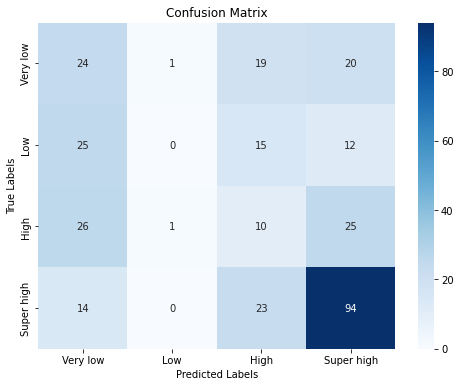

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_adni
y_pred =predictions



desired_order = ['Very low', 'Low', 'High','Super high']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class High vs Rest: 0.5972639414914457
Class Low vs Rest: 0.6997904818916492
Class Super high vs Rest: 0.7919418474997856
Class Very low vs Rest: 0.6491071428571429
Overall One-vs-Rest AUC: 0.6845258534350058


In [47]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [48]:
weighted_auc

0.707788700958461

In [49]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.4142
Weighted Specificity: 0.7617


In [50]:
adni_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"High": list(np.array(predictions_probs)[:, 0]),"Low": list(np.array(predictions_probs)[:, 1]),"Super high": list(np.array(predictions_probs)[:, 2]),"Very low": list(np.array(predictions_probs)[:, 3])})
adni_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_meta_tau.csv",index=False)

In [51]:
existing_columns = [col for col in categorical_columns if col in habs_testing_df.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")


Existing categorical columns: ['Diagnosis', 'Diagnosis of Depression', 'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Retired', 'Diagnosis of diabetes', 'Diagnosis of Osteoporosis', 'Diagnosis of Cancer', 'Diagnosis of Stroke', 'Diagnosis of Thyroid disease', 'Diagnosis of High Cholesterol', 'Diagnosis of Anxiety', 'Diagnosis of High Blood Pressure', 'Diagnosis of traumatic brain injury', 'Diagnosis of Heart Attack', 'Diagnosis of Kidney disease', 'Diagnosis of Arthritis']


In [52]:
habs_testing_df_new= habs_testing_df[existing_columns].astype(object)
habs_testing_df_new.fillna('unknown', inplace=True)
columns_not_in_existing = np.setdiff1d(habs_testing_df.columns, existing_columns)

# Modify the DataFrame by replacing NaN with 'Unknown' in the columns not in existing_columns
habs_testing_df_continuous  =habs_testing_df[columns_not_in_existing].fillna(-9999)


# Concatenating row-wise (default axis=0)
combined_df_habs = pd.concat([habs_testing_df_continuous, habs_testing_df_new], axis=1)
import pandas as pd

# Assume merged_df is already defined from previous steps

# Define the bins and labels
# Define the bins and labels
# Define the bins and labels
bins = [-float('inf'),-0.412928709, 0.19369568, 1.03469779, float('inf')]
labels = ['Very low', 'Low', 'High','Super high']


combined_df_habs['Meta_TAU_CATEGORY'] = pd.cut(combined_df_habs['zscore_meta_tau'], bins=bins, labels=labels)
combined_df_habs.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_final_meta_tau.csv",index=False)

In [53]:
X_habs= combined_df_habs.drop(columns=['zscore_meta_tau','Meta_TAU_CATEGORY',"Med_ID"], axis=1)
y_habs =combined_df_habs.Meta_TAU_CATEGORY

In [54]:
model_features = X.columns
for feature in model_features:
    if (feature not in  X_habs.columns) and (feature in categorical_columns) :
        X_habs[feature] = "unknown"
    elif (feature not in  X_habs.columns) and (feature not in categorical_columns) :
        X_habs[feature] = -9999
X_habs= X_habs[model_features ]
#X_habs.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\dataset\\Gradient boosting\\habs_testing_final_meta_tau.csv",index=False)

In [55]:
predictions = model_tau.predict(X_habs)
predictions_probs = model_tau.predict_proba(X_habs)

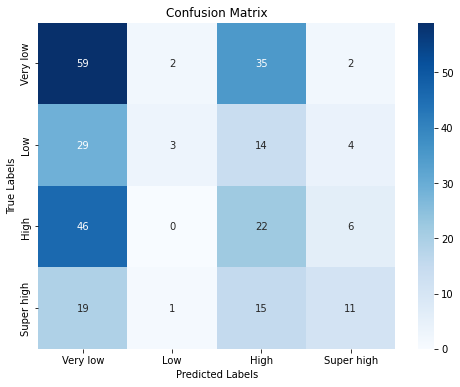

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_habs
y_pred =predictions



desired_order = ['Very low', 'Low','High','Super high']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class High vs Rest: 0.5296043466146558
Class Low vs Rest: 0.5648623853211009
Class Super high vs Rest: 0.6824324324324323
Class Very low vs Rest: 0.5802521008403362
Overall One-vs-Rest AUC: 0.5892878163021313


In [58]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [59]:
weighted_auc

0.5809344727230761

In [60]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.3545
Weighted Specificity: 0.6949


In [61]:
habs_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"High": list(np.array(predictions_probs)[:, 0]),"Low": list(np.array(predictions_probs)[:, 1]),"Super high": list(np.array(predictions_probs)[:, 2]),"Very low": list(np.array(predictions_probs)[:, 3])})
habs_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_meta_tau.csv",index=False)

In [62]:
existing_columns = [col for col in categorical_columns if col in pointer_testing.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")

Existing categorical columns: ['Medication', 'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Retired', 'Diagnosis of diabetes', 'Smoke history', 'Person of Color', 'Diagnosis of Type II diabetes', 'Occupation', 'Diagnosis of CVD']


In [63]:
pointer_testing_new = pointer_testing[existing_columns].astype(object)
pointer_testing_new.fillna('unknown', inplace=True)
columns_not_in_existing = np.setdiff1d(pointer_testing.columns, existing_columns)

# Modify the DataFrame by replacing NaN with 'Unknown' in the columns not in existing_columns
pointer_testing_continuous  =pointer_testing[columns_not_in_existing].fillna(-9999)


# Concatenating row-wise (default axis=0)
combined_df_pointer = pd.concat([pointer_testing_continuous, pointer_testing_new], axis=1)

combined_df_pointer.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_testing_final_meta_tau.csv",index=False)

In [64]:
bins = [-float('inf'),-0.412928709, 0.19369568, 1.03469779, float('inf')]
labels = ['Very low', 'Low', 'High','Super high']

combined_df_pointer['Meta_TAU_CATEGORY'] = pd.cut(combined_df_pointer['zscore_meta_tau'], bins=bins, labels=labels)


In [65]:
X_pointer=combined_df_pointer.drop(columns=['zscore_meta_tau','Meta_TAU_CATEGORY',"PID"], axis=1)
y_pointer =combined_df_pointer.Meta_TAU_CATEGORY

In [66]:
for feature in model_features:
    if (feature not in  X_pointer.columns) and (feature in categorical_columns) :
        X_pointer[feature] = "unknown"
    elif (feature not in  X_pointer.columns) and (feature not in categorical_columns) :
        X_pointer[feature] = -9999

In [67]:
X_pointer= X_pointer[model_features ]
predictions = model_tau.predict(X_pointer)
predictions_probs = model_tau.predict_proba(X_pointer)


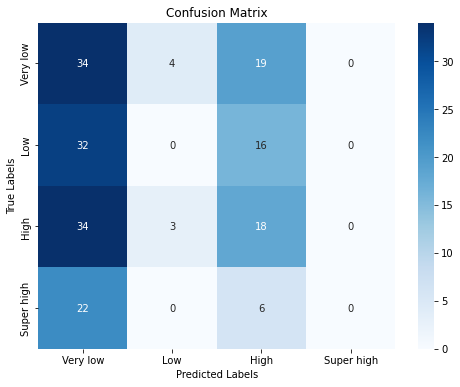

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_pointer
y_pred =predictions



desired_order = ['Very low', 'Low', 'High','Super high']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [69]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.2766
Weighted Specificity: 0.6934


In [70]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class High vs Rest: 0.5569377990430622
Class Low vs Rest: 0.4617559523809524
Class Super high vs Rest: 0.43013392857142857
Class Very low vs Rest: 0.49029061202624885
Overall One-vs-Rest AUC: 0.484779573005423


In [71]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [72]:
weighted_auc

0.49354350822952303

In [73]:
pointer_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"High": list(np.array(predictions_probs)[:, 0]),"Low": list(np.array(predictions_probs)[:, 1]),"Super high": list(np.array(predictions_probs)[:, 2]),"Very low": list(np.array(predictions_probs)[:, 3])})
pointer_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_testing_result_meta_tau.csv",index=False)

In [77]:
drop_group_a4=["AGEYR","APOEGN","FCFREET1","FCFREET2","FCFREET3","FCCUEDT1","FCCUEDT2","FCCUEDT3","LIMMTOTAL","SMOKE","ALCOHOL","CAFFEINE","SUBUSE","AEROBIC","WALKING","SLEEP","SLEEPDAY",
"PXHEADEY","PXCARD","PXPULM","PXABDOM","PXMUSCUL","PXEDEMA","PXSKIN","PXOTHER","NXGAIT","NXMOTOR","NXSENSOR","NXTREMOR","NXFINGER","NXHEEL","NXNERVE","NXOTHER",
"AGEYR","APOEGN","zscore_ctx_tau","centiloid","braak1","meta","VISCODE"
]
A4_test=A4_test.fillna('NA')
A4_test=A4_test[A4_test["zscore_meta_tau"]!="NA"]
A4_test=A4_test.drop(columns=drop_group_a4)
A4_test =A4_test.replace(['Unknown', 'NA'], np.nan)
A4_test["DIAGNOSIS"]="Cognitive normal"
rename_name_a4 = {
                "PTGENDER":"Gender",
                "PTEDUCAT":"Education",
                "PTETHNIC":"Ethnicity",
                "PTRACE":"Race",
                "PTMARRY":"Marrital status",
                "PTNOTRT":"Retired",     
                "APOE4":"APOE4",
                "PTAGE":"Age",
                'MMSCORE': 'Mini-Mental State Examination score',
                'VSWEIGHT': 'Weight (in kg)',
                'VSHEIGHT': 'Height (in cm)',
                'VSBPSYS': 'Systolic blood pressure (mmHg)',
                'VSBPDIA': 'Diastolic blood pressure (mmHg)',
                'VSPULSE': 'Seated Pulse Rate (per minute)',
                'VSRESP': 'Respirations (per minute)',
                'VSTEMP': 'Temperature (in Celsius)',
                'CDSOB': 'Clinical Dementia Rating Scale Sum of Boxes Scores',
                "LDELTOTAL": "Delayed Total Recall test",
                "DIGITTOTAL": "Digit Substitution test",
                "DIAGNOSIS":"Diagnosis",
                "tiv":"Total intracranial",
     "vol:Left-Hippocampus":"Left_Hippocampus",
                "vol:Right-Hippocampus":"Right_Hippocampus",
             "vol:Left-Lateral-Ventricle":"Left_Lateral_Ventricle",
            "vol:Right-Lateral-Ventricle":"Right_Lateral_Ventricle",
           "Left_meta":"Left_meta",
    "Thck:L_entorhinal": "Left_Entorhinal",
    "Thck:R_entorhinal":"Right_Entorhinal",
    "Thck:L_fusiform": "Left_Fusiform",
    "Thck:R_fusiform": "Right_Fusiform",
    "Thck:L_inferiorparietal": "Left Inferior Parietal",
    "Thck:R_inferiorparietal": "Right Inferior Parietal",
    "Thck:L_inferiortemporal": "Left Inferior Temporal",
    "Thck:R_inferiortemporal": "Right Inferior Temporal",
    "Thck:L_middletemporal": "Left Middle Temporal",
    "Thck:R_middletemporal": "Right Middle Temporal",
    "Thck:L_precuneus": "Left Precuneus",
    "Thck:R_precuneus": "Right Precuneus",
    "Thck:L_insula": "Left Insula",
    "Thck:R_insula": "Right Insula",
     'Right_meta':"Right_meta"  
   
}


A4_test = A4_test.rename(columns=rename_name_a4)


C:\Users\25110\AppData\Local\Temp/ipykernel_8032/2179313957.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  A4_test =A4_test.replace(['Unknown', 'NA'], np.nan)


In [78]:
existing_columns = [col for col in categorical_columns if col in A4_test.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")
A4_test_new= A4_test[existing_columns].astype(object)
A4_test_new.fillna('unknown', inplace=True)
columns_not_in_existing = np.setdiff1d(A4_test.columns, existing_columns)

# Modify the DataFrame by replacing NaN with 'Unknown' in the columns not in existing_columns
A4_test_continuous  =A4_test[columns_not_in_existing].fillna(-9999)

# Concatenating row-wise (default axis=0)
combined_df_A4 = pd.concat([A4_test_continuous, A4_test_new], axis=1)

import pandas as pd

# Assume merged_df is already defined from previous steps

bins = [-float('inf'),-0.412928709, 0.19369568, 1.03469779, float('inf')]
labels = ['Very low', 'Low', 'High','Super high']

combined_df_A4['Meta_TAU_CATEGORY'] = pd.cut(combined_df_A4['zscore_meta_tau'], bins=bins, labels=labels)


X_A4=combined_df_A4 .drop(columns=['zscore_meta_tau','Meta_TAU_CATEGORY',"BID"], axis=1)
y_A4 =combined_df_A4 .Meta_TAU_CATEGORY

Existing categorical columns: ['Diagnosis', 'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Retired']


In [79]:
model_features=X.columns
for feature in model_features:
    if (feature not in combined_df_A4 .columns) and (feature in categorical_columns) :
        X_A4 [feature] = "unknown"
    elif (feature not in  combined_df_A4 .columns) and (feature not in categorical_columns) :
        X_A4 [feature] = -9999

X_A4 = X_A4 [model_features ]
predictions = model_tau.predict(X_A4 )
predictions_probs = model_tau.predict_proba(X_A4 )


C:\Users\25110\AppData\Local\Temp/ipykernel_8032/3577163773.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_A4 [feature] = -9999
C:\Users\25110\AppData\Local\Temp/ipykernel_8032/3577163773.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_A4 [feature] = -9999
C:\Users\25110\AppData\Local\Temp/ipykernel_8032/3577163773.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

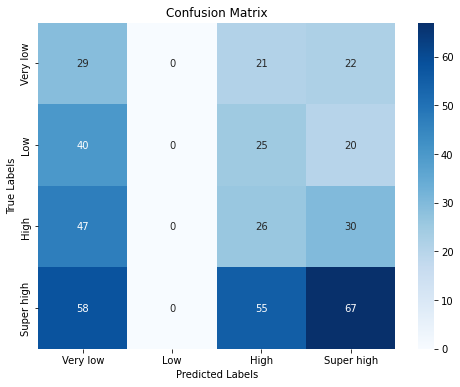

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_A4
y_pred =predictions



desired_order = ['Very low', 'Low', 'High','Super high']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [81]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.2773
Weighted Specificity: 0.7521


In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class High vs Rest: 0.5386765002448792
Class Low vs Rest: 0.56009942004971
Class Super high vs Rest: 0.5904273504273505
Class Very low vs Rest: 0.5241923309178744
Overall One-vs-Rest AUC: 0.5533489004099535


In [83]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [84]:
weighted_auc

0.56161568439195

In [85]:
combined_df_A4.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\GB\\A4_testing_final_meta_tau.csv",index=False)
a4_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"High": list(np.array(predictions_probs)[:, 0]),"Low": list(np.array(predictions_probs)[:, 1]),"Super high": list(np.array(predictions_probs)[:, 2]),"Very low": list(np.array(predictions_probs)[:, 3])})
a4_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\GB\\A4_testing_result_meta_tau.csv",index=False)

## Incomplete

In [86]:

X_adni_subset=X_adni[(X_adni['Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)']!=-9999) | (X_adni["Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)"]!=-9999) | (X_adni["Tau protein concentration in Cerebrospinal Fluid (pg/mL)"]!=-9999) |(X_adni["Phosphorylated tau protein in Cerebrospinal Fluid (pg/mL)"]!=-9999)]
y_adni_subset=y_adni[X_adni_subset.index]


In [87]:
predictions = model_tau.predict(X_adni_subset)
predictions_probs = model_tau.predict_proba(X_adni_subset)


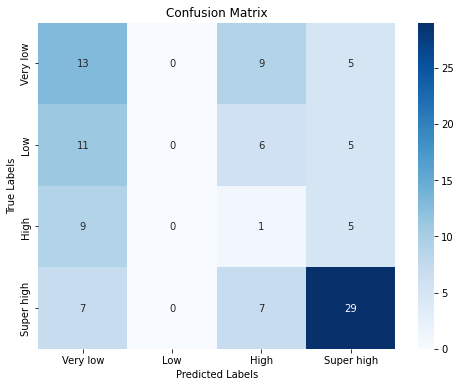

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_adni_subset
y_pred =predictions



desired_order = ['Very low', 'Low', 'High','Super high']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [89]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.4019
Weighted Specificity: 0.7871


In [90]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class High vs Rest: 0.5695652173913043
Class Low vs Rest: 0.5946524064171123
Class Super high vs Rest: 0.7870639534883721
Class Very low vs Rest: 0.6861111111111111
Overall One-vs-Rest AUC: 0.6593481721019749


In [91]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [92]:
weighted_auc

0.6915381420751966

In [93]:
adni_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
adni_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_complete_meta_tau.csv",index=False)

In [94]:
X_adni_subset['Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)']=-9999
X_adni_subset["Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)"]=-9999 
X_adni_subset["Tau protein concentration in Cerebrospinal Fluid (pg/mL)"]=-9999
X_adni_subset["Phosphorylated tau protein in Cerebrospinal Fluid (pg/mL)"]=-9999
y_adni_subset=y_adni[X_adni_subset.index]

C:\Users\25110\AppData\Local\Temp/ipykernel_8032/2873835460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_adni_subset['Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)']=-9999
C:\Users\25110\AppData\Local\Temp/ipykernel_8032/2873835460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_adni_subset["Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)"]=-9999
C:\Users\25110\AppData\Local\Temp/ipykernel_8032/2873835460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [95]:
predictions = model_tau.predict(X_adni_subset)
predictions_probs = model_tau.predict_proba(X_adni_subset)


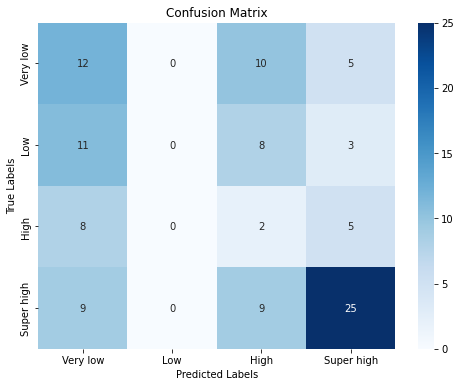

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_adni_subset
y_pred =predictions



desired_order = ['Very low', 'Low', 'High','Super high']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [97]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.3645
Weighted Specificity: 0.7889


In [98]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class High vs Rest: 0.5384057971014493
Class Low vs Rest: 0.5850267379679144
Class Super high vs Rest: 0.747093023255814
Class Very low vs Rest: 0.6638888888888889
Overall One-vs-Rest AUC: 0.6336036118035167


In [99]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [100]:
weighted_auc 

0.6635203288954753

In [101]:
adni_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
adni_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_incomplete_meta_tau.csv",index=False)

## Incomplete HABS-HD

In [102]:


X_habs_subset=X_habs[(X_habs['Amyloid beta 40 peptide in the blood plasma(pg/mL)']>0) | (X_habs["Amyloid beta 42 peptide in the blood plasma(pg/mL)"]>0) | (X_habs["Tau protein concentration in the blood plasma(pg/mL)"]>0) |(X_habs["Phosphorylated tau protein in the blood plasma(pg/mL)"]>0)]
y_habs_subset=y_habs[X_habs_subset.index]


In [103]:
X_habs_subset['Amyloid beta 40 peptide in the blood plasma(pg/mL)']

0      163.50
1      161.96
2      220.74
3      171.67
4      157.87
        ...  
135    108.92
143    130.05
145    173.13
166    161.24
206    168.08
Name: Amyloid beta 40 peptide in the blood plasma(pg/mL), Length: 90, dtype: float64

In [104]:
predictions = model_tau.predict(X_habs_subset)
predictions_probs = model_tau.predict_proba(X_habs_subset)


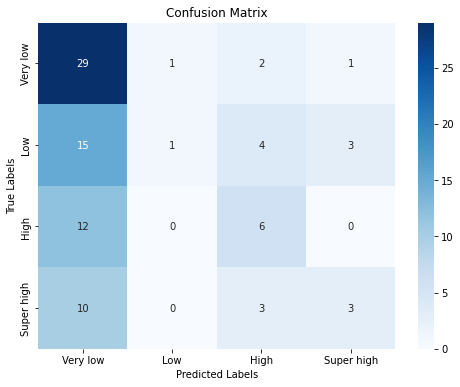

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_habs_subset
y_pred =predictions



desired_order = ['Very low', 'Low', 'High','Super high']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [106]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.4333
Weighted Specificity: 0.7236


In [108]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class High vs Rest: 0.6373456790123456
Class Low vs Rest: 0.482154445165477
Class Super high vs Rest: 0.6646959459459459
Class Very low vs Rest: 0.7187666135034556
Overall One-vs-Rest AUC: 0.6257406709068061


In [109]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [110]:
weighted_auc

0.6324023093530818

In [111]:
habs_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
habs_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_complete_meta_tau.csv",index=False)

In [112]:
X_habs_subset['Amyloid beta 40 peptide in the blood plasma(pg/mL)']=-9999
X_habs_subset["Amyloid beta 42 peptide in the blood plasma(pg/mL)"]=-9999 
X_habs_subset["Tau protein concentration in the blood plasma(pg/mL)"]=-9999
X_habs_subset["Phosphorylated tau protein in the blood plasma(pg/mL)"]=-9999


C:\Users\25110\AppData\Local\Temp/ipykernel_8032/3728062156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_habs_subset['Amyloid beta 40 peptide in the blood plasma(pg/mL)']=-9999
C:\Users\25110\AppData\Local\Temp/ipykernel_8032/3728062156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_habs_subset["Amyloid beta 42 peptide in the blood plasma(pg/mL)"]=-9999
C:\Users\25110\AppData\Local\Temp/ipykernel_8032/3728062156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [113]:
X_habs_subset["Phosphorylated tau protein in the blood plasma(pg/mL)"]

0     -9999
1     -9999
2     -9999
3     -9999
4     -9999
       ... 
135   -9999
143   -9999
145   -9999
166   -9999
206   -9999
Name: Phosphorylated tau protein in the blood plasma(pg/mL), Length: 90, dtype: int64

In [114]:
predictions = model_tau.predict(X_habs_subset)
predictions_probs = model_tau.predict_proba(X_habs_subset)


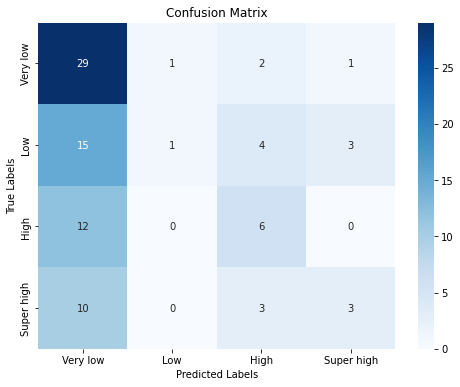

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_habs_subset
y_pred =predictions



desired_order = ['Very low', 'Low', 'High','Super high']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [116]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.4333
Weighted Specificity: 0.7236


In [117]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class High vs Rest: 0.6358024691358024
Class Low vs Rest: 0.4808565866320571
Class Super high vs Rest: 0.6646959459459459
Class Very low vs Rest: 0.7198298777246146
Overall One-vs-Rest AUC: 0.625296219859605


In [118]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [119]:
weighted_auc

0.6321518559669909

In [120]:
habs_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
habs_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_incomplete_meta_tau.csv",index=False)